Step 0: Setup and Install Libraries

In [3]:
!pip install pandas mlxtend matplotlib seaborn


Step 1: Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


Step 2: Load Dataset

In [5]:
df = pd.read_csv('Groceries_dataset.csv')
df.head()


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


Step 3: Understand the Dataset

In [6]:
print(f"Total unique items: {df['itemDescription'].nunique()}")
print(df['itemDescription'].unique()[:10])


Total unique items: 167
['tropical fruit' 'whole milk' 'pip fruit' 'other vegetables' 'rolls/buns'
 'pot plants' 'citrus fruit' 'beef' 'frankfurter' 'chicken']


Step 4: Prepare Data — Group into Transactions

In [7]:
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index(name='items')
transactions.head()


,Member_number,Date,items
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"


Step 5: One-Hot Encoding for Apriori

In [8]:
te = TransactionEncoder()
te_ary = te.fit(transactions['items']).transform(transactions['items'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.head()


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Step 6: Apply Apriori Algorithm

In [9]:
frequent_itemsets = apriori(df_encoded, min_support=0.03, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets.head(10)


,support,itemsets
25,0.157923,(whole milk)
14,0.122101,(other vegetables)
18,0.110005,(rolls/buns)
22,0.097106,(soda)
26,0.085879,(yogurt)
19,0.069572,(root vegetables)
23,0.067767,(tropical fruit)
2,0.060683,(bottled water)
20,0.060349,(sausage)
6,0.053131,(citrus fruit)


Step 7: Visualize Top Frequent Itemsets

C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


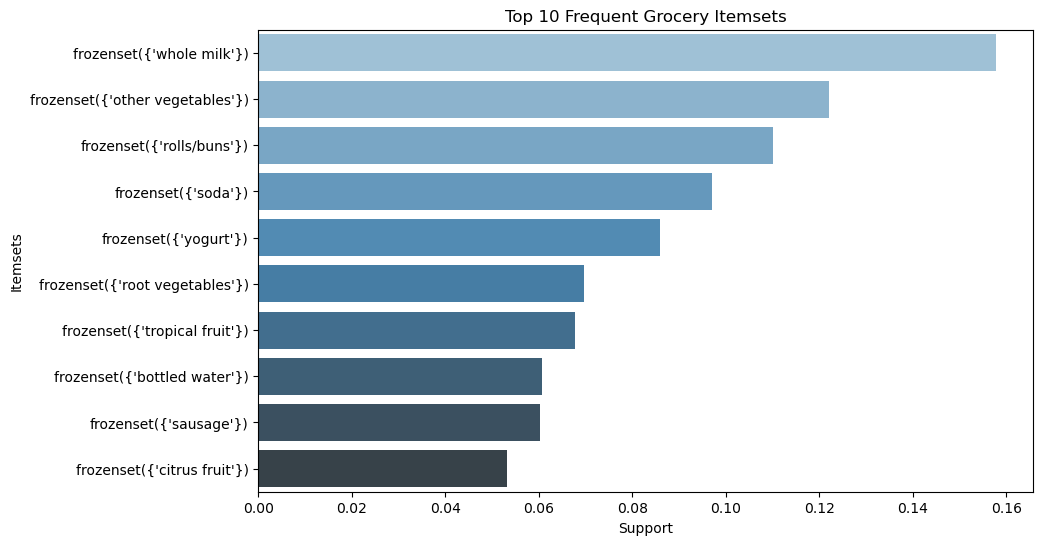

In [10]:
plt.figure(figsize=(10,6))
top_items = frequent_itemsets.head(10)
sns.barplot(x='support', y=top_items['itemsets'].astype(str), data=top_items, palette='Blues_d')
plt.title('Top 10 Frequent Grocery Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

Step 8: Generate Association Rules

In [11]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules = rules.sort_values(by='confidence', ascending=False)
rules.head(10)[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift


Step 9: Visualize Rules — Support vs Confidence 


C:\Users\Harsh\AppData\Local\Temp\ipykernel_2244\2363562587.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='support', y='confidence', size='lift', sizes=(50, 300), hue='lift', data=rules, palette='coolwarm')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


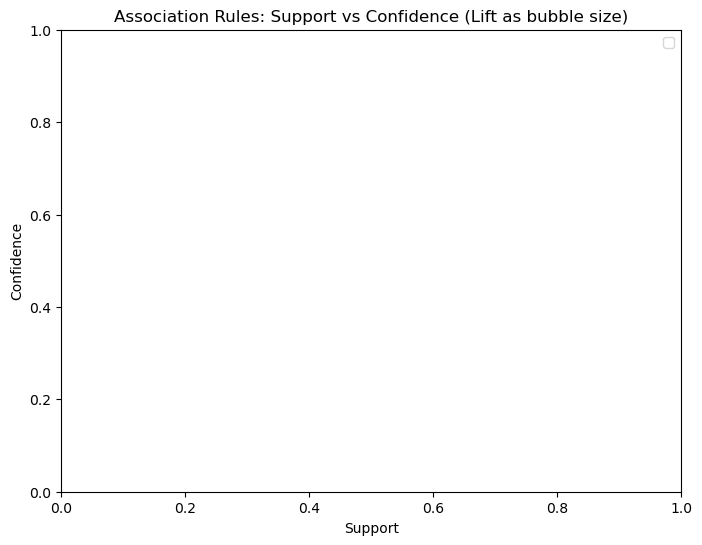

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='support', y='confidence', size='lift', sizes=(50, 300), hue='lift', data=rules, palette='coolwarm')
plt.title('Association Rules: Support vs Confidence (Lift as bubble size)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend()
plt.show()